## 1. Importing Libraries and dataset

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("TASK-ML-INTERN.csv")

## 2. Data Overview

In [4]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [23]:
df.size

224500

In [24]:
df.shape

(500, 449)

In [25]:
df.dtypes

0                float64
1                float64
2                float64
3                float64
4                float64
                  ...   
444              float64
445              float64
446              float64
447              float64
vomitoxin_ppb    float64
Length: 449, dtype: object

In [29]:
# Cheching Missing Values in Dataset
print("No. of Missing Values: ",df.isnull().sum().sum())

No. of Missing Values:  0


## 3. Data Cleaning & EDA

In [5]:
# Dropping Identifier Column
df.drop(columns=['hsi_id'], inplace=True)

In [31]:
# Seperating Features and Target
X = df.drop(columns=['vomitoxin_ppb'])  # Spectral data
y = df['vomitoxin_ppb']  #Target Variable

In [32]:
# Normalizing using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

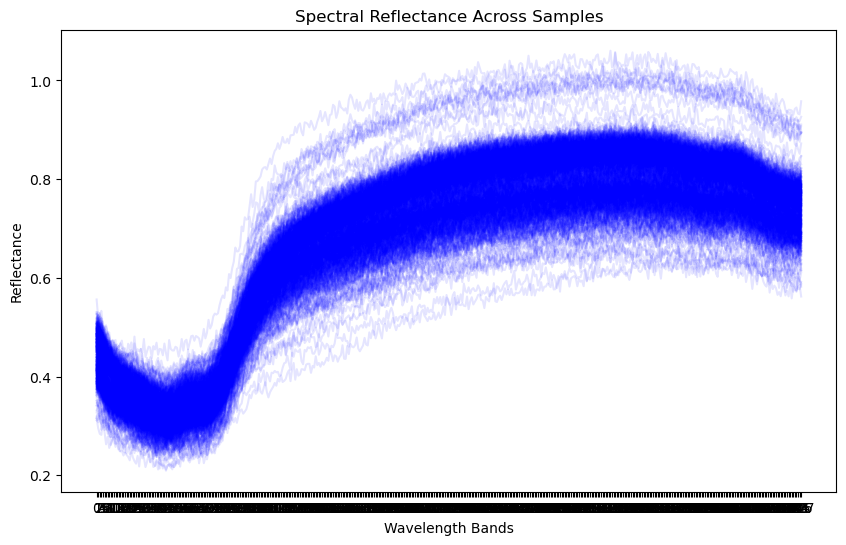

In [34]:
# Visualizing spectral bands
plt.figure(figsize=(10, 6))
plt.plot(X.T, alpha=0.1, color='blue')
plt.title("Spectral Reflectance Across Samples")
plt.xlabel("Wavelength Bands")
plt.ylabel("Reflectance")
plt.show()


## 4. Dimensionality Reduction and Visualization

In [37]:
# Dimension Reduction usinf PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained Variance by PCA: {pca.explained_variance_ratio_}")

Explained Variance by PCA: [0.87077909 0.05849069]


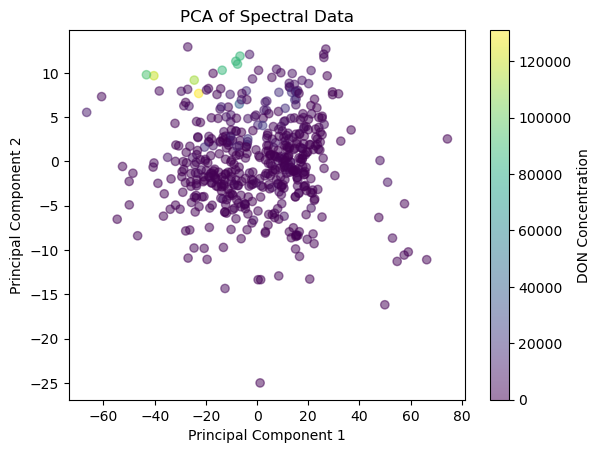

In [38]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar(label='DON Concentration')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Spectral Data")
plt.show()

### 5. Train-Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 6. Model Training and Selection

In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## 7. Evaluating Performance by metrices

In [59]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae} | RMSE: {rmse} | R² Score: {r2}")

MAE: 3765.0568 | RMSE: 11483.805982806223 | R² Score: 0.5282211884116356


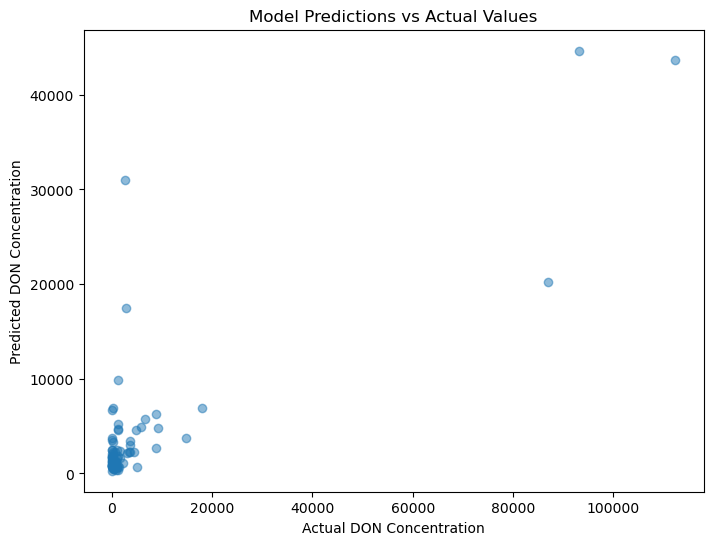

In [58]:
# Visualization for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Model Predictions vs Actual Values")
plt.show()


